In [1]:
# %pip install --upgrade pip
# %pip install pandas numpy matplotlib
# %pip install scikit-learn
# %pip install odfpy
# %pip install kneed

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from kneed import KneeLocator

import matplotlib.pyplot as plt

In [3]:
sample_data = pd.read_excel("202211_en.ods", engine="odf", index_col=None)
sample_data.rename(columns={'            StationDate': "StationDate"}, inplace=True)
sample_data.columns

sample_data.index = range(1, sample_data.shape[0]+1)

In [4]:
# day_lines = sample_data.plot.line(legend=None)

In [5]:
sample_data["day_of_week"] = sample_data['StationDate'].dt.day_name()
day_of_week_mark = sample_data[["StationDate", "day_of_week"]]

In [6]:
sample_data.head()

,StationDate,Songshan Airport,Zhongshan Junior High School,Nanjing Fuxing,Zhongxiao Fuxing,Daan,Technology Building,Liuzhangli,Linguang,Xinhai,...,Jingping,Zhonghe,Qiaohe,Zhongyuan,Banxin,Banqiao(Circular Line),Xingpu Minsheng,Xingfu,New Taipei Industrial Park,day_of_week
1,2022-11-01,3614,13390,40071,35788,24151,13755,10520,3716,3094,...,4233,4729,2488,3736,3165,7348,2471,3922,5282,Tuesday
2,2022-11-02,3572,13384,40111,36458,23851,13528,10602,3754,3008,...,4021,4610,2434,3591,3044,7335,2401,3872,4984,Wednesday
3,2022-11-03,3733,13150,39857,37400,23797,13512,10433,3605,3113,...,3945,4638,2459,3611,2952,7755,2364,3841,4968,Thursday
4,2022-11-04,4349,14062,42148,44432,25270,13868,11118,3901,3162,...,4216,4819,2569,3607,3096,10184,2539,4268,5285,Friday
5,2022-11-05,2770,8362,22229,41220,14931,10190,7567,3292,2223,...,2867,4207,1221,1319,1946,8153,1876,3235,3376,Saturday


## Normalize along station axis

In [7]:
day_data = sample_data.drop(columns=["StationDate", "day_of_week"])

scaler = MinMaxScaler()
# scaler = StandardScaler()

scaler.fit(day_data)
scaled_day_data = scaler.fit_transform(day_data)
scaled_day_data = pd.DataFrame(scaled_day_data, columns=day_data.columns)
scaled_day_data = scaled_day_data.transpose()


day_data = day_data.transpose()
scaled_day_data.columns = day_data.columns

## Find k of groups(by day) (result: 3 groups)

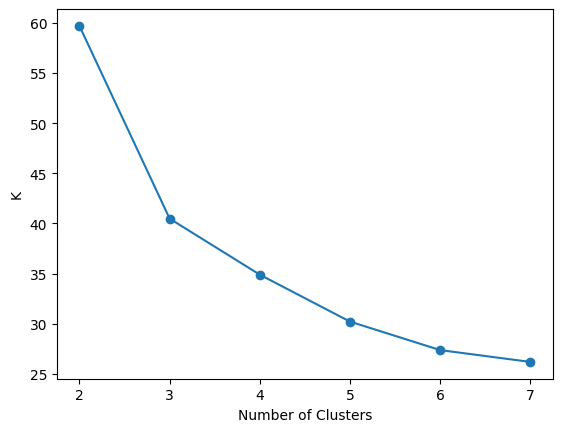

In [8]:
def find_k(df, upperbound=8):
    ks = []
    for k in range(2, upperbound):
        model = KMeans(n_clusters=k, random_state=7, n_init="auto").fit(df)
        ks.append(model.inertia_)

    #Plotting the inertia of the models    
    k_values = range(2, upperbound)
    plt.plot(k_values, ks, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('K')

    kn = KneeLocator(k_values, ks, curve='convex', direction='decreasing')
    return kn.knee

k = find_k(scaled_day_data)

In [9]:
def k_means_df(df, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=7, n_init="auto")
    kmeans.fit(df)
    df['cluster'] = kmeans.labels_
    return df

In [10]:
km_day = k_means_df(scaled_day_data, k)
km_day.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,cluster
Songshan Airport,0.533543,0.514633,0.587123,0.864475,0.153534,0.045925,0.615489,0.498424,0.546150,0.667267,...,0.622692,0.646105,0.760468,1.000000,0.129221,0.000000,0.665016,0.646556,0.612337,2
Zhongshan Junior High School,0.866658,0.865906,0.836553,0.950953,0.235951,0.003011,0.777847,0.871425,0.876317,0.878324,...,0.854240,0.930758,0.943552,1.000000,0.182639,0.000000,0.775088,0.858254,0.905294,1
Nanjing Fuxing,0.817270,0.818644,0.809920,0.888610,0.204438,0.000000,0.737412,0.819159,0.825410,0.828467,...,0.833929,0.882702,0.921962,1.000000,0.186062,0.035275,0.764306,0.830013,0.863983,1
Zhongxiao Fuxing,0.211562,0.234133,0.265867,0.502762,0.394556,0.071756,0.193269,0.242690,0.315052,0.935959,...,0.241881,0.256502,0.307910,0.528938,0.268158,0.000000,0.175785,0.225408,0.292717,0
Daan,0.849878,0.830590,0.827118,0.921821,0.257104,0.000000,0.788415,0.841070,0.873666,0.866465,...,0.840298,0.914106,0.932107,1.000000,0.236852,0.051948,0.804616,0.866658,0.887875,1


In [11]:
byday_cluster = km_day[["cluster"]]
byday_cluster.reset_index(inplace=True)
byday_cluster.columns = ["StationCount", "cluster"]
# byday_cluster["StationName"] = byday_cluster.index
byday_cluster.groupby("cluster").agg("count")

,StationCount
cluster,
0,20
1,66
2,33


In [12]:
# day_data["group"] = km_day["cluster"]

In [13]:
# group0 = day_data.loc[day_data["group"] == 0]
# group1 = day_data.loc[day_data["group"] == 1]
# group2 = day_data.loc[day_data["group"] == 2]

group0 = km_day.loc[km_day["cluster"] == 0]
group1 = km_day.loc[km_day["cluster"] == 1]
group2 = km_day.loc[km_day["cluster"] == 2]

In [14]:
# group0_lines = group0.drop(columns="cluster").transpose().plot.line(legend=None)

In [15]:
# group1_lines = group1.drop(columns="cluster").transpose().plot.line(legend=None)

In [16]:
# group2_lines = group2.drop(columns="cluster").transpose().plot.line(legend=None)

In [17]:
group0_ = group0.drop(columns="cluster").transpose()
group0_["mean"] = group0_.mean(axis=1)

group1_ = group1.drop(columns="cluster").transpose()
group1_["mean"] = group1_.mean(axis=1)

group2_ = group2.drop(columns="cluster").transpose()
group2_["mean"] = group2_.mean(axis=1)

In [18]:
# df = group0_

# sunday_mark = day_of_week_mark.index[day_of_week_mark['day_of_week'] == "Sunday"].tolist()

# plt.figure(figsize=(15, 8))
# for col in df.columns:
#     if not col == "mean":
#         plt.plot(range(1, df.shape[0]+1), df[col], color="#d9d9d9")
#     else:
#         plt.plot(range(1, df.shape[0]+1), df[col], color="blue", label="mean")

# #plot week boundary
# for marker in sunday_mark:
#     plt.axvline(x = marker, color = 'gray', linestyle='--',linewidth=1)

# #plot start and end boundary
# plt.axvline(x = 1, color = 'k', linestyle='--',linewidth=1)
# plt.axvline(x = df.shape[0], color = 'k', linestyle='--',linewidth=1)

# plt.legend()
# plt.show()


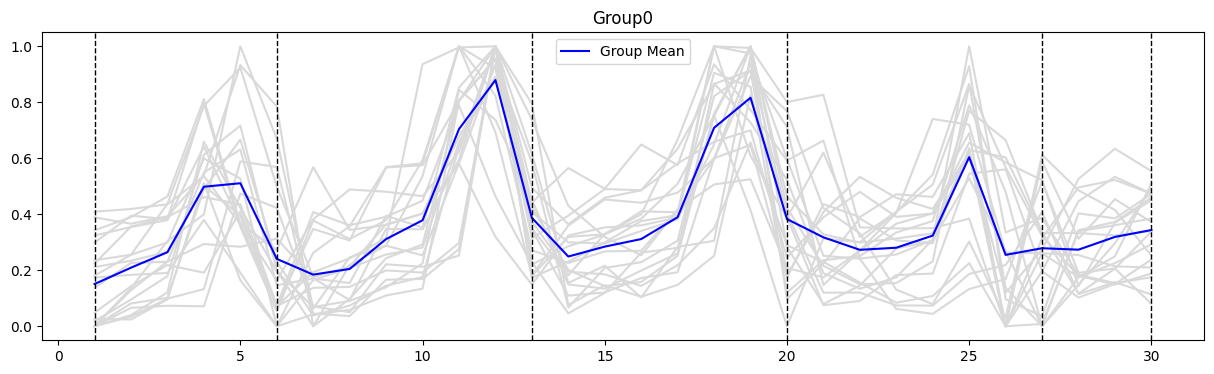

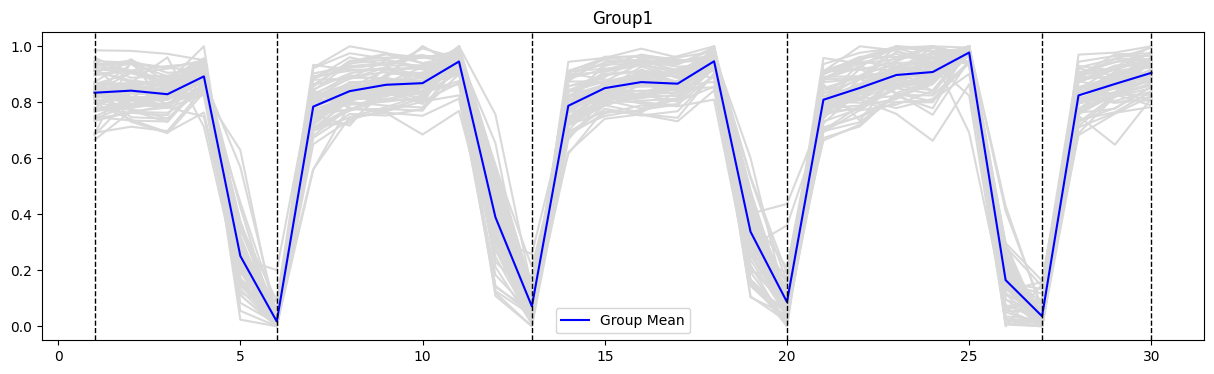

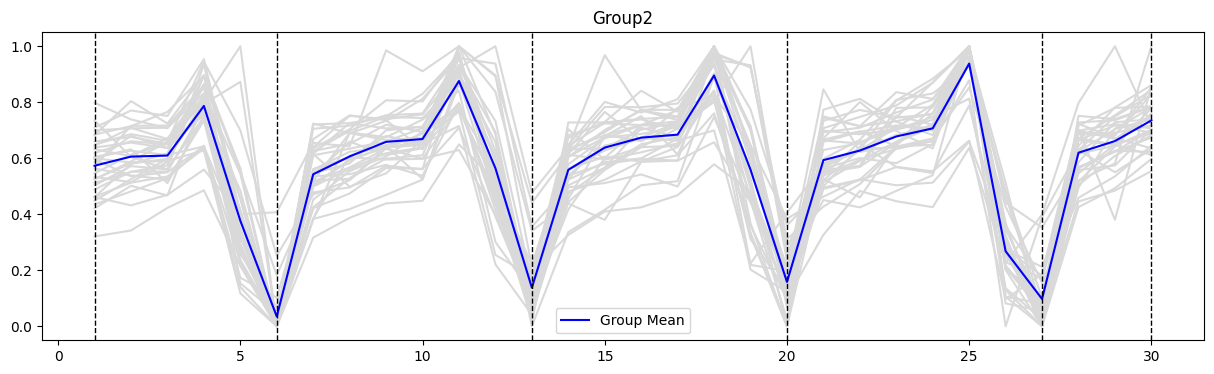

In [19]:
def plot_group_lines(df, day_of_week_mark, title=None):
    sunday_mark = day_of_week_mark.index[day_of_week_mark['day_of_week'] == "Sunday"].tolist()

    plt.figure(figsize=(15, 4))
    for col in df.columns:
        if not col == "mean":
            plt.plot(range(1, df.shape[0]+1), df[col], color="#d9d9d9")
        else:
            plt.plot(range(1, df.shape[0]+1), df[col], color="blue", label="Group Mean")

    #plot week boundary
    for marker in sunday_mark:
        plt.axvline(x = marker, color="k", linestyle='--', linewidth=1)

    #plot start and end boundary
    plt.axvline(x = 1, color='k', linestyle='--',linewidth=1)
    plt.axvline(x = df.shape[0], color="k", linestyle='--', linewidth=1)

    if title is not None:
        plt.title(title)
    plt.legend()
    plt.show()

plot_group_lines(group0_, day_of_week_mark, "Group0")
plot_group_lines(group1_, day_of_week_mark, "Group1")
plot_group_lines(group2_, day_of_week_mark, "Group2")

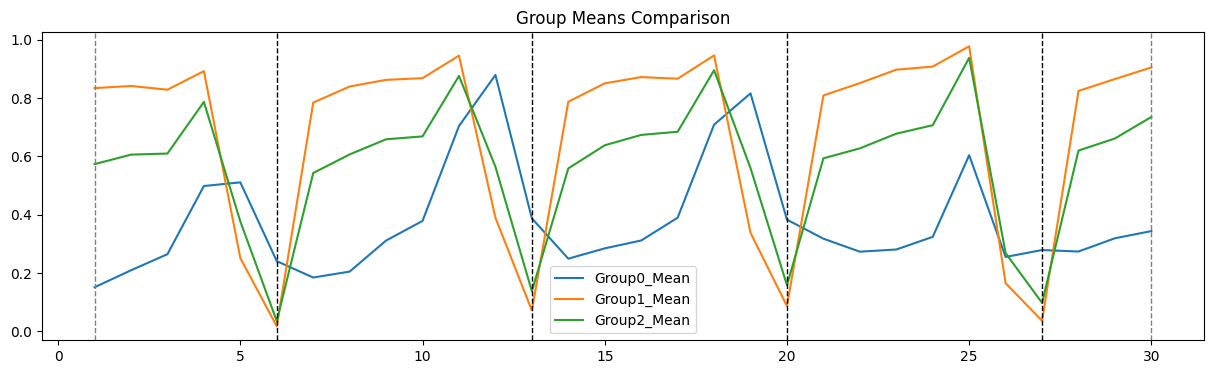

In [38]:
groups_means = pd.concat([group0_[["mean"]], group1_[["mean"]], group2_[["mean"]]], axis=1)
groups_means.columns = ["Group0_Mean", "Group1_Mean", "Group2_Mean"]
# groups_means_lines = groups_means.plot.line()


plt.figure(figsize=(15, 4))
for col in groups_means.columns:
    plt.plot(range(1, groups_means.shape[0]+1), groups_means[col], label=col)
#plot week boundary
sunday_mark = day_of_week_mark.index[day_of_week_mark['day_of_week'] == "Sunday"].tolist()
for marker in sunday_mark:
    plt.axvline(x = marker, color="k", linestyle='--', linewidth=1)

#plot start and end boundary
plt.axvline(x = 1, color="gray", linestyle='--',linewidth=1)
plt.axvline(x = groups_means.shape[0], color="gray", linestyle='--', linewidth=1)

plt.title("Group Means Comparison")
plt.legend()
plt.show()


## Group0 inspection

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,cluster
Zhongxiao Fuxing,0.211562,0.234133,0.265867,0.502762,0.394556,0.071756,0.193269,0.242690,0.315052,0.935959,...,0.241881,0.256502,0.307910,0.528938,0.268158,0.000000,0.175785,0.225408,0.292717,3
Taipei Zoo,0.000000,0.065721,0.073357,0.071312,0.473957,0.422689,0.070903,0.050314,0.221434,0.212163,...,0.241069,0.062040,0.044314,0.133215,0.168530,0.517044,0.191028,0.206163,0.079902,2
Jiannan Rd.,0.137484,0.226459,0.230091,0.549157,0.631388,0.146563,0.170687,0.154345,0.395071,0.352529,...,0.250843,0.334890,0.375875,0.789105,0.480415,0.000000,0.148379,0.296239,0.494682,5
Dahu Park,0.048714,0.143024,0.219018,0.191348,0.409977,0.072097,0.137178,0.140686,0.199532,0.191738,...,0.155885,0.084178,0.108340,0.225253,0.000000,0.261107,0.254482,0.213952,0.210055,2
Taipei Nangang Exhibition Center,0.324255,0.354356,0.379174,0.641625,0.368325,0.271951,0.567903,0.344154,0.361692,0.402951,...,0.353345,0.349522,0.350393,0.384317,0.000000,0.008404,0.339376,0.360905,0.385132,0
Xiaobitan,0.388944,0.366239,0.392892,0.539980,0.932873,0.784798,0.000000,0.219151,0.288253,0.536032,...,0.270484,0.404738,0.740375,0.719645,0.263574,0.260612,0.175716,0.249753,0.509378,6
Xindian,0.223577,0.355981,0.389663,0.461382,0.435830,0.074623,0.347561,0.306330,0.567073,0.575203,...,0.480256,0.390825,0.402729,0.610046,0.000000,0.314750,0.495935,0.522648,0.473577,4
Taipei Main Station,0.000000,0.039896,0.121116,0.658826,0.422348,0.195384,0.068790,0.090626,0.139115,0.224601,...,0.134113,0.174638,0.309718,1.000000,0.334806,0.387362,0.183999,0.154260,0.175175,1
Zhongshan,0.018429,0.095339,0.178747,0.612648,0.716614,0.199698,0.000000,0.097916,0.243166,0.292068,...,0.145306,0.278232,0.304672,0.769606,0.664911,0.336433,0.116346,0.205915,0.338169,5
Yuanshan,0.180530,0.255228,0.437384,0.787175,0.923327,0.499071,0.175767,0.213290,0.364080,0.401952,...,0.385107,0.306691,0.296468,0.635804,0.000000,0.588871,0.312732,0.453996,0.372328,4


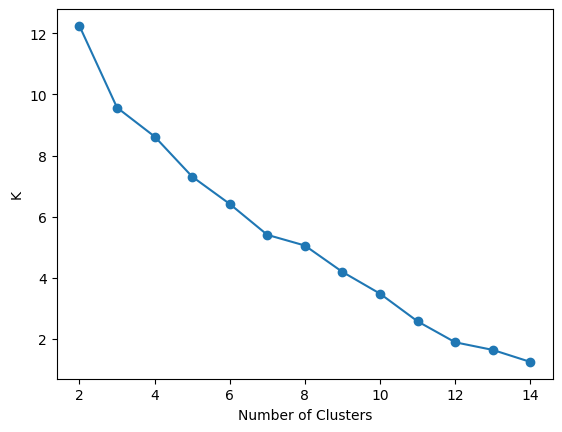

In [20]:
k_group0 = find_k(group0.drop(columns="cluster"), 15)

km_group0 = k_means_df(group0.drop(columns="cluster"), k_group0)
km_group0

In [21]:
group0_group_count = km_group0[["cluster"]]
group0_group_count.reset_index(inplace=True)
group0_group_count.columns = ["Station", "cluster"]
group0_group_count.groupby("cluster").agg("count")

,Station
cluster,
0,3
1,3
2,4
3,1
4,4
5,4
6,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                         1         2         3         4         5         6  \
Zhongxiao Fuxing  0.211562  0.234133  0.265867  0.502762  0.394556  0.071756   

                         7        8         9        10  ...        22  \
Zhongxiao Fuxing  0.193269  0.24269  0.315052  0.935959  ...  0.241881   

                        23       24        25        26   27        28  \
Zhongxiao Fuxing  0.256502  0.30791  0.528938  0.268158  0.0  0.175785   

                        29        30  cluster  
Zhongxiao Fuxing  0.225408  0.292717        3  

[1 rows x 31 columns]


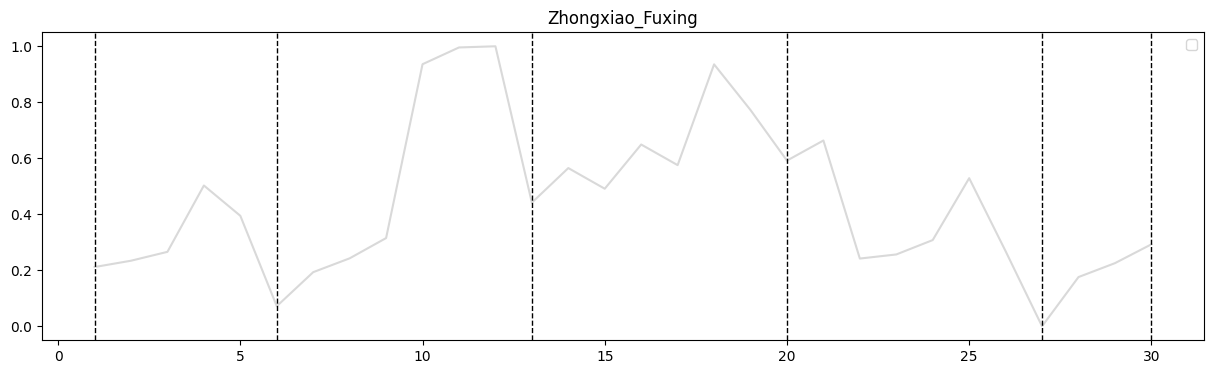

In [22]:
print(km_group0[km_group0["cluster"] == 3])
Zhongxiao_Fuxing = km_group0.loc[km_group0["cluster"] == 3]
Zhongxiao_Fuxing_ = Zhongxiao_Fuxing.drop(columns="cluster").transpose()
plot_group_lines(Zhongxiao_Fuxing_, day_of_week_mark, "Zhongxiao_Fuxing")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                  1         2         3        4         5         6    7  \
Xiaobitan  0.388944  0.366239  0.392892  0.53998  0.932873  0.784798  0.0   

                  8         9        10  ...        22        23        24  \
Xiaobitan  0.219151  0.288253  0.536032  ...  0.270484  0.404738  0.740375   

                 25        26        27        28        29        30  cluster  
Xiaobitan  0.719645  0.263574  0.260612  0.175716  0.249753  0.509378        6  

[1 rows x 31 columns]


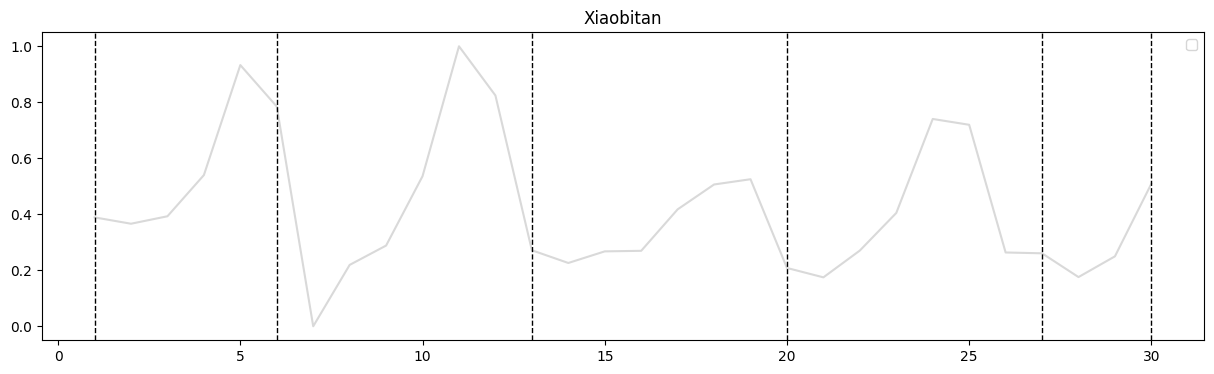

In [23]:
print(km_group0[km_group0["cluster"] == 6])
Xiaobitan = km_group0.loc[km_group0["cluster"] == 6]
Xiaobitan_ = Xiaobitan.drop(columns="cluster").transpose()
plot_group_lines(Xiaobitan_, day_of_week_mark, "Xiaobitan")

In [24]:
# group0 = km_group0.loc[km_group0["cluster"] == 0]
# group1 = km_group0.loc[km_group0["cluster"] == 1]
# group2 = km_group0.loc[km_group0["cluster"] == 2]
# group3 = km_group0.loc[km_group0["cluster"] == 3]
# group4 = km_group0.loc[km_group0["cluster"] == 4]
# group5 = km_group0.loc[km_group0["cluster"] == 5]
# group6 = km_group0.loc[km_group0["cluster"] == 6]

# group0_ = group0.drop(columns="cluster").transpose()
# group1_ = group1.drop(columns="cluster").transpose()
# group2_ = group2.drop(columns="cluster").transpose()
# group3_ = group3.drop(columns="cluster").transpose()
# group4_ = group4.drop(columns="cluster").transpose()
# group5_ = group5.drop(columns="cluster").transpose()
# group6_ = group6.drop(columns="cluster").transpose()

In [25]:
# plot_group_lines(group0_, day_of_week_mark, "Group0")
# plot_group_lines(group1_, day_of_week_mark, "Group1")
# plot_group_lines(group2_, day_of_week_mark, "Group2")
# plot_group_lines(group3_, day_of_week_mark, "Group3")
# plot_group_lines(group4_, day_of_week_mark, "Group4")
# plot_group_lines(group5_, day_of_week_mark, "Group5")
# plot_group_lines(group6_, day_of_week_mark, "Group6")